In [1]:
import pandas as pd


In [2]:
df1 = pd.read_csv("C:\\Users\\drago\\IS460\\data\\df1.csv")
df1 = df1.drop('Unnamed: 0', axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\drago\\IS460\\data\\df1.csv'

In [4]:
X = df1.drop('price_boxcox_scaled', axis = 1)
y = df1['price_boxcox_scaled']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape)
print(y_test.shape)

(238021, 9)
(59506,)


In [47]:
from sklearn.neural_network import MLPRegressor

In [36]:
mlp = MLPRegressor(max_iter = 500, activation = 'relu')
mlp

MLPRegressor(max_iter=500)

In [74]:
mlp.fit(X_train,y_train)

MLPRegressor(max_iter=4500)

In [75]:
y_mlp_train_pred = mlp.predict(X_train)
y_mlp_test_pred = mlp.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error

mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)

mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)

In [97]:
mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2','Test MAPE']

In [98]:
mlp_results

,Method,Training MSE,Training R2,Test MSE,Test R2,Test MAPE
0,Multi-Layer Perceptron,0.126674,0.873322,0.127668,0.871895,1.348455


In [80]:
mlp1 = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp1

MLPRegressor(max_iter=1000)

In [81]:
mlp1.fit(X_train,y_train)

MLPRegressor(max_iter=1000)

In [82]:
y_mlp1_train_pred = mlp1.predict(X_train)
y_mlp1_test_pred = mlp1.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

mlp1_train_mse = mean_squared_error(y_train, y_mlp1_train_pred)
mlp1_train_r2 = r2_score(y_train, y_mlp1_train_pred)

mlp1_test_mse = mean_squared_error(y_test, y_mlp1_test_pred)
mlp1_test_r2 = r2_score(y_test, y_mlp1_test_pred)
mlp1_test_mape = mean_absolute_percentage_error(y_test, y_mlp1_test_pred)

In [101]:
mlp1_results = pd.DataFrame(['Multi-Layer Perceptron', mlp1_train_mse, mlp1_train_r2, mlp1_test_mse, mlp1_test_r2,mlp1_test_mape]).transpose()
mlp1_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2','Test MAPE']

In [102]:
mlp1_results

,Method,Training MSE,Training R2,Test MSE,Test R2,Test MAPE
0,Multi-Layer Perceptron,0.125971,0.874026,0.126946,0.87262,1.320629


In [103]:
### checking if increasing no of iterations improve model
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 1000+500*i, activation = 'relu')
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.125607     0.87439  0.126654  0.872912   

  Test MAPE  
0  1.346908  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron      0.12184    0.878157  0.122785  0.876795   

  Test MAPE  
0   1.32374  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.123479    0.876518  0.124434  0.875141   

  Test MAPE  
0  1.349507  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.123148    0.876848  0.124292  0.875283   

  Test MAPE  
0  1.392124  


In [9]:
import scipy
scipy.special.inv_boxcox(0.3686, lmbda = 0)

TypeError: inv_boxcox() takes from 2 to 3 positional arguments but 1 were given

In [2]:
adjrsquared1 = 1-((1-0.876795)*(59506-1)/(59506-8-1))
print(adjrsquared1)

0.8767784337865775


In [73]:
### checking if increasing no of iterations improve model
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 2500+500*i, activation = 'relu')
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method Training MSE Training R2  Test MSE   Test R2
0  Multi-Layer Perceptron     0.126634    0.873362  0.127799  0.871764
                   Method Training MSE Training R2  Test MSE  Test R2
0  Multi-Layer Perceptron     0.122622    0.877375  0.123816  0.87576
                   Method Training MSE Training R2  Test MSE  Test R2
0  Multi-Layer Perceptron     0.122866     0.87713  0.124036  0.87554
                   Method Training MSE Training R2  Test MSE   Test R2
0  Multi-Layer Perceptron     0.126278    0.873718  0.127095  0.872471


In [104]:
### seeing if diff activation functions improve model
activation_type = ['identity','logistic','tanh','relu']

for i in range(0,4):
    mlp = MLPRegressor(max_iter = 1000, activation = activation_type[i])
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2','Test MAPE']
    print(mlp_results)
    
    ###tanh lower MSE and MAPE but relu higher test R-squared

                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.175549    0.824447  0.177376  0.822018   

  Test MAPE  
0  1.556856  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.138572    0.861424  0.139495  0.860028   

  Test MAPE  
0   1.29629  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.135782    0.864215  0.136405  0.863128   

  Test MAPE  
0   1.28243  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.123983    0.876014  0.125071  0.874502   

  Test MAPE  
0  1.353684  


In [105]:
### checking if increasing no of iterations improve model tanh
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 1000+500*i, activation = 'tanh')
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.134151    0.865845  0.135328  0.864209   

  Test MAPE  
0  1.397965  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.133682    0.866315  0.134592  0.864948   

  Test MAPE  
0  1.365513  
                   Method Training MSE Training R2 Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.132832    0.867164  0.13369  0.865853   

  Test MAPE  
0  1.348845  
                   Method Training MSE Training R2 Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.135249    0.864747   0.1359  0.863636   

  Test MAPE  
0  1.304916  


In [4]:
adjrsquared2 = 1-((1-0.863636)*(59506-1)/(59506-8-1))
print(adjrsquared2)

0.8636176644200547


In [ ]:
### MAPE of tanh lower than relu but lower test R2

In [106]:
### checking if increasing no of iterations improve model tanh
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 3000+500*i, activation = 'tanh')
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.134471    0.865525  0.135565  0.863971   

  Test MAPE  
0  1.385101  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.134357     0.86564  0.135296  0.864241   

  Test MAPE  
0  1.326529  
                   Method Training MSE Training R2  Test MSE  Test R2  \
0  Multi-Layer Perceptron     0.133772    0.866225  0.134729  0.86481   

  Test MAPE  
0  1.346577  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.134122    0.865875  0.135221  0.864316   

  Test MAPE  
0  1.337493  


### Trying on unscaled price

In [2]:
df_new = pd.read_csv("C:\\Users\\drago\\IS460\\data\\df_prepared.csv")
df_new = df_new.drop('Unnamed: 0', axis = 1)

In [3]:
X = df_new.drop('price', axis = 1)
y = df_new['price']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape)
print(y_test.shape)

(236551, 9)
(59138,)


In [5]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor

In [21]:
mlp = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp.fit(X_train,y_train)
y_mlp_test_pred = mlp.predict(X_test)
mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp_results)

                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  65710876.013315  0.872004  0.485275


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
### checking if increasing no of iterations improve model
for i in range(1,3):
    mlp = MLPRegressor(max_iter = 1000+500*i, activation = 'relu')
    mlp.fit(X_train,y_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  62742832.607655  0.877785   0.45576


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  63793891.154189  0.875738  0.460051


In [19]:
#1500 is the best

In [20]:
activation_type = ['identity','logistic','tanh','relu']

for i in range(0,4):
    mlp = MLPRegressor(max_iter = 1000, activation = activation_type[i])
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2','Test MAPE']
    print(mlp_results)

                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  73029746.130671  0.857748  0.549625
                   Method          Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  513383804.989277 -0.000004  2.370834
                   Method          Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  513383790.057295 -0.000004  2.370856


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  64522880.815933  0.874318  0.468069


In [ ]:
### including more hidden layers to uncover nonlinear relationships

In [ ]:
mlp2 = MLPRegressor(max_iter = 1500, activation = 'relu', hidden_layer_sizes =(100,100,))
mlp2.fit(X_train,y_train)
y_mlp2_test_pred = mlp2.predict(X_test)
mlp2_test_mse = mean_squared_error(y_test, y_mlp2_test_pred)
mlp2_test_r2 = r2_score(y_test, y_mlp2_test_pred)
mlp2_test_mape = mean_absolute_percentage_error(y_test, y_mlp2_test_pred)
ml_results = pd.DataFrame(['Multi-Layer Perceptron',mlp2_test_mse, mlp2_test_r2,mlp2_test_mape]).transpose()
mlp2_results.columns = ['Method', 'Test MSE', 'Test Adj-R2', 'Test MAPE']
print(mlp2_results)

In [11]:
mlp2_results = pd.DataFrame(['Multi-Layer Perceptron',mlp2_test_mse, mlp2_test_r2,mlp2_test_mape]).transpose()
mlp2_results.columns = ['Method', 'Test MSE', 'Test Adj-R2', 'Test MAPE']
print(mlp2_results)

                   Method         Test MSE Test Adj-R2 Test MAPE
0  Multi-Layer Perceptron  51584182.216205    0.898795   0.35521


In [12]:
mlp3 = MLPRegressor(max_iter = 1500, activation = 'relu', hidden_layer_sizes =(100,100,100,))
mlp3.fit(X_train,y_train)
y_mlp3_test_pred = mlp3.predict(X_test)
mlp3_test_mse = mean_squared_error(y_test, y_mlp3_test_pred)
mlp3_test_r2 = r2_score(y_test, y_mlp3_test_pred)
mlp3_test_mape = mean_absolute_percentage_error(y_test, y_mlp3_test_pred)
mlp3_results = pd.DataFrame(['Multi-Layer Perceptron',mlp3_test_mse, mlp3_test_r2,mlp3_test_mape]).transpose()
mlp3_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp3_results)

                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  52935436.647024  0.896144  0.364633


In [ ]:
### change number of hidden units

In [28]:
### checking if increasing no of iterations improve model
for i in range(1,4):
    mlp = MLPRegressor(max_iter = 1500, activation = 'relu',hidden_layer_sizes=(100+50*i,100+50*i,100+50*i,))
    mlp.fit(X_train,y_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  50430866.428704  0.901767  0.319129


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  51776443.180937  0.899146  0.326477


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  66271538.203005  0.870912  0.469502


### took ~ 2hours to train 1 iteration of model

1st iteration
Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  50430866.428704  0.901767  0.319129

2nd iteration
Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  51776443.180937  0.899146  0.326477

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [2]:
df_new1 = pd.read_csv("C:\\Users\\drago\\OneDrive\\Desktop\\UNI\\Y3S2\\ML&Apps\\df_prepared.csv")
df_new1 = df_new1.drop('Unnamed: 0', axis = 1)

In [3]:
X3 = df_new1.drop('price', axis = 1)
y3 = df_new1['price']
y3 = np.log(y3)

In [4]:
y4 = df_new1['price']

Text(0.5, 6.79999999999999, 'price')

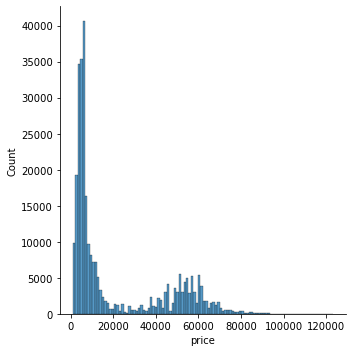

In [30]:
sns.displot(y4)
plt.xlabel("price")

In [7]:
import math

Text(0.5, 6.79999999999999, 'log_price')

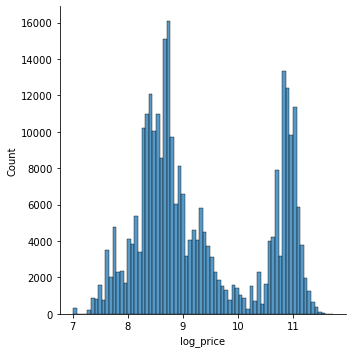

In [28]:
import seaborn as sns
sns.displot(y3)
plt.xlabel("log_price")

In [5]:
from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3, test_size = 0.2)
print(X3_train.shape)
print(y3_test.shape)

(236551, 9)
(59138,)


In [14]:
mlp = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp.fit(X3_train,y3_train)
y3_mlp_test_pred = mlp.predict(X3_test)
mlp_test_mse = mean_squared_error(y3_test, y3_mlp_test_pred)
mlp_test_r2 = r2_score(y3_test, y3_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y3_test, y3_mlp_test_pred)
mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp_results)

                   Method  Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.812848 -2.892395  0.209059


In [11]:
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 1000+500*i, activation = 'relu')
    mlp.fit(X3_train,y3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_rmse = math.sqrt(mean_squared_error(np.exp(y3_test), np.exp(y_mlp_test_pred)))
    mlp_test_r2 = r2_score(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_test_mape = mean_absolute_percentage_error(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_rmse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test RMSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method    Test RMSE  Test R2 Test MAPE
0  Multi-Layer Perceptron  7988.727335  0.87612   0.32956
                   Method    Test RMSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  8237.651954  0.868279  0.329674
                   Method    Test RMSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  8064.864219  0.873747   0.34496
                   Method    Test RMSE  Test R2 Test MAPE
0  Multi-Layer Perceptron  8226.371094  0.86864  0.322213


In [8]:
activation_type = ['identity','logistic','tanh','relu']

for i in range(0,4):
    mlp = MLPRegressor(max_iter = 2000, activation = activation_type[i])
    mlp.fit(X3_train,y3_train)
    y_mlp_train_pred = mlp.predict(X3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_rmse = math.sqrt(mean_squared_error(np.exp(y3_test), np.exp(y_mlp_test_pred)))
    mlp_test_r2 = r2_score(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_test_mape = mean_absolute_percentage_error(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_test_rmse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2','Test MAPE']
    print(mlp_results)

                   Method     Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  9311.159974  0.831711  0.466406
                   Method     Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  7968.197288  0.876755  0.339028
                   Method     Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  8000.048747  0.875768  0.323126
                   Method     Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  8358.501007  0.864386  0.333109


In [10]:
import math
math.sqrt(66067397.876894  )

8128.1853987771465

In [11]:
math.sqrt(72158374.229896  )

8494.608538943745

In [57]:
mlp2 = MLPRegressor(max_iter = 2000, activation = 'relu')
mlp2.fit(X3_train,y3_train)
y2_mlp_test_pred = mlp.predict(X3_test)

In [59]:
np.exp(y3_test)

235369    51405.0
46540      2336.0
284341    51595.0
36138      7950.0
114139     9670.0
           ...   
4777       4811.0
82995      3998.0
23401      6395.0
193037     9284.0
283051    69739.0
Name: price, Length: 59138, dtype: float64

In [60]:
np.exp(y2_mlp_test_pred)

array([52353.92770384,  4559.39270184, 47006.62303006, ...,
        7262.77412741,  6332.3410245 , 54175.60262123])

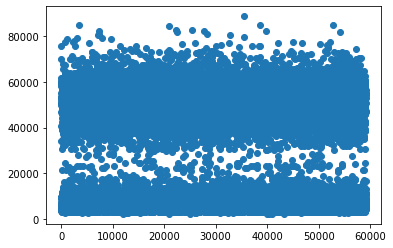

In [61]:
import matplotlib.pyplot as plt
x_values = np.arange(len(y2_mlp_test_pred))
plt.scatter (x_values,np.exp(y2_mlp_test_pred))
plt.show()

In [62]:
mean_squared_error(np.exp(y3_test), np.exp(y2_mlp_test_pred))

64588031.149816774

In [63]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y2_mlp_test_pred))

0.3416516487410684

In [16]:
for i in range(1,4):
    mlp = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(100+50*i,100+50*i,100+50*i,))
    mlp.fit(X3_train,y3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_mse = mean_squared_error(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_test_r2 = r2_score(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_test_mape = mean_absolute_percentage_error(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method         Test MSE  Test R2 Test MAPE
0  Multi-Layer Perceptron  53313360.826505  0.89601  0.296335
                   Method         Test MSE  Test R2 Test MAPE
0  Multi-Layer Perceptron  52934206.152955  0.89675  0.282791


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  56760245.856404  0.889287   0.27774


                  Method         Test MSE  Test R2 Test MAPE
0  Multi-Layer Perceptron  53313360.826505  0.89601  0.296335
                   Method         Test MSE  Test R2 Test MAPE
0  Multi-Layer Perceptron  52934206.152955  0.89675  0.282791

In [65]:
mlp = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(200,200,200,))
mlp.fit(X3_train,y3_train)
y3_mlp_test_pred = mlp.predict(X3_test)

In [ ]:
r2_score(np.exp(y3_test), np.exp(y3_mlp_test_pred))

In [66]:
mean_squared_error(np.exp(y3_test), np.exp(y3_mlp_test_pred))

55831492.688444555

In [67]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y3_mlp_test_pred))

0.28821622750360726

In [24]:
solver_type = ['lbfgs','sgd']

for i in range(0,2):
    mlp = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(250,250,250,250,250,), solver = solver_type[i])
    mlp.fit(X3_train,y3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_mse = mean_squared_error(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_test_r2 = r2_score(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_test_mape = mean_absolute_percentage_error(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

KeyboardInterrupt: 

In [6]:
learning_type = ['invscaling', 'adaptive']

for i in range(0,2):
    mlp = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(250,250,250,250,250,), learning_rate = learning_type[i])
    mlp.fit(X3_train,y3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_mse = mean_squared_error(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_test_r2 = r2_score(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_test_mape = mean_absolute_percentage_error(np.exp(y3_test), np.exp(y_mlp_test_pred))
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method        Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  53547765.39646  0.894389  0.279911
                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  52957587.986392  0.895553  0.284623


In [17]:
mlp4 = MLPRegressor(max_iter = 2000, activation = 'logistic',hidden_layer_sizes=(250,250,250,250,250,), learning_rate = 'invscaling')
mlp4.fit(X3_train,y3_train)
y4_mlp_test_pred = mlp4.predict(X3_test)
mlp_test_rmse4 = math.sqrt(mean_squared_error(np.exp(y3_test), np.exp(y4_mlp_test_pred)))
mlp_test_r24 = r2_score(np.exp(y3_test), np.exp(y4_mlp_test_pred))
mlp_test_mape4 = mean_absolute_percentage_error(np.exp(y3_test), np.exp(y4_mlp_test_pred))
mlp_results4 = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_rmse4, mlp_test_r24,mlp_test_mape4]).transpose()
mlp_results4.columns = ['Method', 'Test RMSE', 'Test R2', 'Test MAPE']
print(mlp_results4)

                   Method   Test RMSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  7401.86601  0.893652  0.293306


In [18]:
mlp4 = MLPRegressor(max_iter = 2000, activation = 'tanh',hidden_layer_sizes=(250,250,250,250,250,), learning_rate = 'invscaling')
mlp4.fit(X3_train,y3_train)
y4_mlp_test_pred = mlp4.predict(X3_test)
mlp_test_rmse4 = math.sqrt(mean_squared_error(np.exp(y3_test), np.exp(y4_mlp_test_pred)))
mlp_test_r24 = r2_score(np.exp(y3_test), np.exp(y4_mlp_test_pred))
mlp_test_mape4 = mean_absolute_percentage_error(np.exp(y3_test), np.exp(y4_mlp_test_pred))
mlp_results4 = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_rmse4, mlp_test_r24,mlp_test_mape4]).transpose()
mlp_results4.columns = ['Method', 'Test RMSE', 'Test R2', 'Test MAPE']
print(mlp_results4)

                   Method    Test RMSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  7268.203807  0.897458  0.294609


In [20]:
mlp4 = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(200,200,200,200,200,), learning_rate = 'invscaling')
mlp4.fit(X3_train,y3_train)
y4_mlp_test_pred = mlp4.predict(X3_test)
mlp_test_rmse4 = math.sqrt(mean_squared_error(np.exp(y3_test), np.exp(y4_mlp_test_pred)))
mlp_test_r24 = r2_score(np.exp(y3_test), np.exp(y4_mlp_test_pred))
mlp_test_mape4 = mean_absolute_percentage_error(np.exp(y3_test), np.exp(y4_mlp_test_pred))
mlp_results4 = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_rmse4, mlp_test_r24,mlp_test_mape4]).transpose()
mlp_results4.columns = ['Method', 'Test RMSE', 'Test R2', 'Test MAPE']
print(mlp_results4)

                   Method    Test RMSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  8243.152233  0.868103  0.275459


In [11]:
math.sqrt(53547765.39646  )

7317.633865974711

In [12]:
math.sqrt(52957587.986392)

7277.196437254665

In [ ]:
mlp31 = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(200,200,200,200,200,))
mlp31.fit(X3_train,y3_train)

In [11]:
y31_mlp_test_pred = mlp31.predict(X3_test)

In [21]:
r2_score(np.exp(y3_test), np.exp(y31_mlp_test_pred))

0.8900406436051147

In [12]:
mean_squared_error(np.exp(y3_test), np.exp(y31_mlp_test_pred))

56194429.13494007

In [13]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y31_mlp_test_pred))

0.2780360958805733

In [14]:
mlp32 = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(250,250,250,250,250,))
mlp32.fit(X3_train,y3_train)
y32_mlp_test_pred = mlp32.predict(X3_test)

In [20]:
r2_score(np.exp(y3_test), np.exp(y32_mlp_test_pred))

0.8960346283178194

In [15]:
mean_squared_error(np.exp(y3_test), np.exp(y32_mlp_test_pred))

53131219.59809644

In [16]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y32_mlp_test_pred))

0.28523113309632014

In [17]:
mlp34 = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(250,250,250,250,250,), solver = 'lbfgs')
mlp34.fit(X3_train,y3_train)
y34_mlp_test_pred = mlp34.predict(X3_test)
r2_score(np.exp(y3_test), np.exp(y34_mlp_test_pred))
mean_squared_error(np.exp(y3_test), np.exp(y34_mlp_test_pred))
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y34_mlp_test_pred))

C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.2873045120095656

In [19]:
r2_score(np.exp(y3_test), np.exp(y34_mlp_test_pred))

0.8922289909010466

In [20]:
mean_squared_error(np.exp(y3_test), np.exp(y34_mlp_test_pred))

55112311.084411666

In [9]:
import math
math.sqrt(55112311.084411666)

7423.766637254411

In [21]:

mean_absolute_percentage_error(np.exp(y3_test), np.exp(y34_mlp_test_pred))

0.2873045120095656

In [13]:
mlp35 = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(250,250,250,250,250,), solver = 'sgd')
mlp35.fit(X3_train,y3_train)
y35_mlp_test_pred = mlp35.predict(X3_test)
r2_score(np.exp(y3_test), np.exp(y35_mlp_test_pred))
mean_squared_error(np.exp(y3_test), np.exp(y35_mlp_test_pred))
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y35_mlp_test_pred))

0.31190989668315017

In [14]:
r2_score(np.exp(y3_test), np.exp(y35_mlp_test_pred))

0.8871069977623862

In [15]:
mean_squared_error(np.exp(y3_test), np.exp(y35_mlp_test_pred))

57731613.637020096

In [10]:
math.sqrt(57731613.637020096)

7598.132246612986

In [16]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y35_mlp_test_pred))

0.31190989668315017

In [17]:
mlp33 = MLPRegressor(max_iter = 2500, activation = 'relu',hidden_layer_sizes=(250,250,250,250,250,))
mlp33.fit(X3_train,y3_train)
y33_mlp_test_pred = mlp33.predict(X3_test)

C:\Users\drago\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
r2_score(np.exp(y3_test), np.exp(y33_mlp_test_pred))

In [18]:
mean_squared_error(np.exp(y3_test), np.exp(y33_mlp_test_pred))

66854890.08997579

In [19]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y33_mlp_test_pred))

0.3272276962744363

In [9]:
mlp34 = MLPRegressor(max_iter = 100, activation = 'relu',hidden_layer_sizes=(250,250,250,250,250,))
mlp34.fit(X3_train,y3_train)
y34_mlp_test_pred = mlp34.predict(X3_test)

C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [10]:
r2_score(np.exp(y3_test), np.exp(y34_mlp_test_pred))

0.8563625690764707

In [11]:
mean_squared_error(np.exp(y3_test), np.exp(y34_mlp_test_pred))

73826998.45122136

In [12]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y34_mlp_test_pred))

0.2826448069137469

In [50]:
import math

In [52]:
(5953.0-df_new.price.mean())/math.sqrt(512179149.04947245)

-0.6503656843282907

In [41]:
df_new

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt,price
0,-1.368800,-1.732372,0.198274,-2.491100,0.236474,0.370940,-0.674351,2.375914,-1.742522,5953.0
1,-1.368800,-1.732372,-0.298600,-2.491100,0.445839,0.370940,-0.674351,2.375914,-1.691940,5953.0
2,-1.562898,-1.732372,-0.298600,-2.491100,-2.002790,0.370940,-0.674351,2.375914,-1.742522,5956.0
3,0.885018,-1.732372,0.469739,-2.491100,-0.820969,0.370940,-0.674351,2.375914,-1.717006,5955.0
4,0.885018,-1.732372,0.469739,-2.491100,0.445839,0.370940,-0.674351,2.375914,-1.691940,5955.0
...,...,...,...,...,...,...,...,...,...,...
295684,0.885018,1.074924,0.469739,0.433789,0.753675,-0.305768,1.482907,-0.743546,-0.128743,55377.0
295685,0.885018,1.074924,-1.671408,0.433789,0.236474,-0.305768,1.482907,-0.743546,-0.078388,55377.0
295686,0.885018,1.074924,-0.298600,0.433789,0.236474,-0.305768,1.482907,-0.743546,0.387089,55377.0
295687,0.885018,1.074924,-0.298600,0.433789,0.753675,-0.305768,1.482907,-0.743546,-0.140713,55377.0


In [16]:
from sklearn.preprocessing import StandardScaler
X4 = df_new1.drop('price', axis = 1)
df_new1['price'] = StandardScaler().fit_transform(df_new1[['price']])
y4 = df_new1['price']

In [17]:
df_new1['price']

0        -0.650367
1        -0.650367
2        -0.650234
3        -0.650278
4        -0.650278
            ...   
295684    1.533508
295685    1.533508
295686    1.533508
295687    1.533508
295688    1.533508
Name: price, Length: 295689, dtype: float64

In [18]:
y4

0        -0.650367
1        -0.650367
2        -0.650234
3        -0.650278
4        -0.650278
            ...   
295684    1.533508
295685    1.533508
295686    1.533508
295687    1.533508
295688    1.533508
Name: price, Length: 295689, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y4, test_size = 0.2)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp.fit(X_train,y_train)
y_mlp_test_pred = mlp.predict(X_test)
mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp_results)


mlp = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(200,200,200,))
mlp.fit(X4_train,y4_train)
y4_mlp_test_pred = mlp.predict(X4_test)

C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [22]:
inverse_transform(y4_test)

NameError: name 'inverse_transform' is not defined

In [ ]:
mlp4 = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp4.fit(X4_train,y4_train)
y4_mlp_test_pred = mlp.predict(X4_test)
mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)

In [30]:
y4_train.values.reshape(-1, 1)

array([[-0.45749263],
       [-0.36001717],
       [-0.84522933],
       ...,
       [-0.83855717],
       [ 1.78099641],
       [-0.74757713]])

In [31]:
scalery = StandardScaler().fit(y4_train.values.reshape(-1, 1))

In [57]:
(5953.0-df_new.price.mean())/math.sqrt(512179149.04947245)

-0.6503656843282907

In [58]:
(y4_test*math.sqrt(512179149.04947245))+df_new.price.mean()

82250      2899.969949
37809      4978.973464
53014      5101.973672
147137    13523.987914
74089      3281.970595
              ...     
152502    10017.981985
163632     4265.972259
262265    64831.074672
149890     8306.979092
82225      1889.968241
Name: price, Length: 59138, dtype: float64

In [63]:
y4_mlp_test_pred*math.sqrt(512179149.04947245)+df_new.price.mean()

array([ 4710.94033348,  7154.10833196,  9081.87527811, ...,
       62170.07075849,  5318.8763995 ,  5522.90186507])

In [64]:
mean_squared_error((y4_test*math.sqrt(512179149.04947245))+df_new.price.mean(), y4_mlp_test_pred*math.sqrt(512179149.04947245)+df_new.price.mean())

51627449.37230832

In [65]:
mean_absolute_percentage_error((y4_test*math.sqrt(512179149.04947245))+df_new.price.mean(), y4_mlp_test_pred*math.sqrt(512179149.04947245)+df_new.price.mean())

0.3562995490148447

In [ ]:
### log transformation better, despite much faster training speed

In [19]:
##seems like 1500 iterations is the best

In [34]:
activation_type = ['identity','logistic','tanh','relu']

for i in range(0,4):
    mlp = MLPRegressor(max_iter = 2000, activation = activation_type[i])
    mlp.fit(X3_train,y3_train)
    y_mlp_train_pred = mlp.predict(X3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_mse1 = mean_squared_error(y3_test, y3_mlp_test_pred)
    mlp_test_r21 = r2_score(y3_test, y3_mlp_test_pred)
    mlp_test_mape1 = mean_absolute_percentage_error(y3_test, y3_mlp_test_pred)
    mlp_results1 = pd.DataFrame(['Multi-Layer Perceptron', mlp_test_mse1, mlp_test_r21,mlp_test_mape1]).transpose()
    mlp_results1.columns = ['Method', 'Test MSE', 'Test R2','Test MAPE']
    print(mlp_results)

                   Method Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.47306 -2.603898  0.198911
                   Method Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.47306 -2.603898  0.198911
                   Method Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.47306 -2.603898  0.198911
                   Method Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.47306 -2.603898  0.198911


In [25]:
mlp = MLPRegressor(max_iter = 2000, activation = 'identity')
mlp.fit(X3_train,y3_train)
y3_mlp_test_pred = mlp.predict(X3_test)
mlp_test_mse = mean_squared_error(y3_test, y3_mlp_test_pred)
mlp_test_r2 = r2_score(y3_test, y3_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y3_test, y3_mlp_test_pred)
mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp_results)

                   Method   Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  29.293148 -22.69086  0.506795
